<a href="https://colab.research.google.com/github/paki66/artificialintelligence/blob/main/cisti_projekt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import requests
from io import StringIO

url = "https://raw.githubusercontent.com/paki66/artificialintelligence/main/spam.csv"
s=requests.get(url).text

df = pd.read_csv(StringIO(s))
df

In [2]:
df = df.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis=1)
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will �_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [4]:
numOfSpam = 0
numOfHam = 0

for i in range(len(df.index)):
  if df.at[i, "v1"] == "ham":
    numOfHam += 1
  else:
    numOfSpam += 1
numOfHam

4825

([<matplotlib.patches.Wedge at 0x7f71bf5837f0>,
 [Text(-1.0038714981945518, 0.4497132587689916, 'ham'),
  Text(1.0038714771419537, -0.44971330576360763, 'spam')])

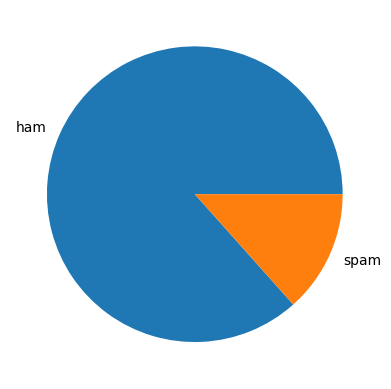

In [5]:
import matplotlib.pyplot as plt
labels = "ham", "spam"
sizes = [numOfHam, numOfSpam]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels)

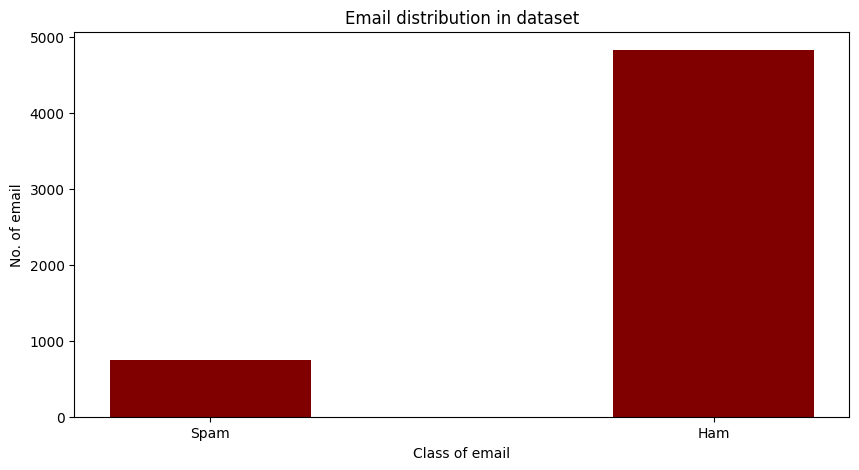

In [6]:
import numpy as np

values = [numOfSpam, numOfHam]
classes = ["Spam", "Ham"]

fig = plt.figure(figsize = (10, 5))

plt.bar(classes, values, color ='maroon',
        width = 0.4)

plt.xlabel("Class of email")
plt.ylabel("No. of email")
plt.title("Email distribution in dataset")
plt.show()

In [7]:
from sklearn.model_selection import train_test_split

y=df['v1']
X=df["v2"]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, stratify=y)

In [ ]:
y_val = y_val.reset_index(drop = True)
y_val

In [ ]:
X_val = X_val.reset_index(drop = True)
X_val

In [ ]:
X_train = X_train.reset_index(drop = True)
X_train

In [ ]:
y_train = y_train.reset_index(drop = True)
y_train

In [12]:
numOfSpamTrain = 0
numOfHamTrain = 0
numOfSpamTest = 0
numOfHamTest = 0

for i in range(1,len(y_train)):
  if y_train[i]=="ham":
    numOfHamTrain+=1
  else:
    numOfSpamTrain+=1

for i in range(1,len(y_val)):
  if y_val[i]=="ham":
    numOfHamTest+=1
  else:
    numOfSpamTest+=1

([<matplotlib.patches.Wedge at 0x7f71b5872800>,
 [Text(-1.0038880869579652, 0.44967622670525637, 'ham train'),
  Text(1.0038881290596877, -0.4496761327144681, 'spam train')])

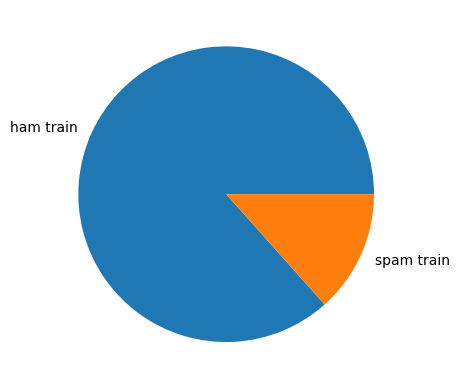

In [13]:
labels = "ham train", "spam train"
sizes = [numOfHamTrain, numOfSpamTrain]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels)

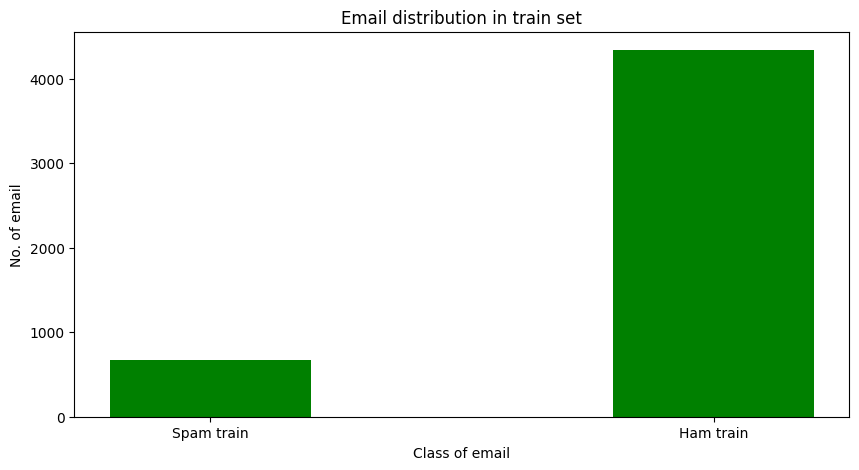

In [14]:
values = [numOfSpamTrain, numOfHamTrain]
classes = ["Spam train", "Ham train"]

fig = plt.figure(figsize = (10, 5))

plt.bar(classes, values, color ='green',
        width = 0.4)

plt.xlabel("Class of email")
plt.ylabel("No. of email")
plt.title("Email distribution in train set")
plt.show()

([<matplotlib.patches.Wedge at 0x7f71b5721960>,
 [Text(-1.003040826106092, 0.45156295371122834, 'ham test'),
  Text(1.0030408049669033, -0.45156300066695787, 'spam test')])

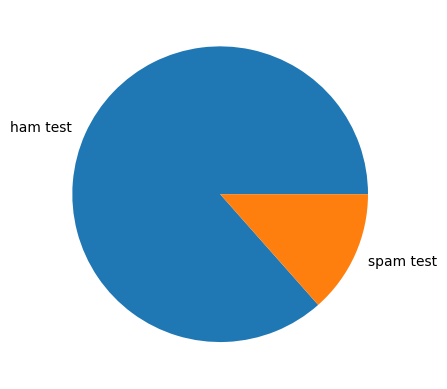

In [15]:
labels = "ham test", "spam test"
sizes = [numOfHamTest, numOfSpamTest]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels)

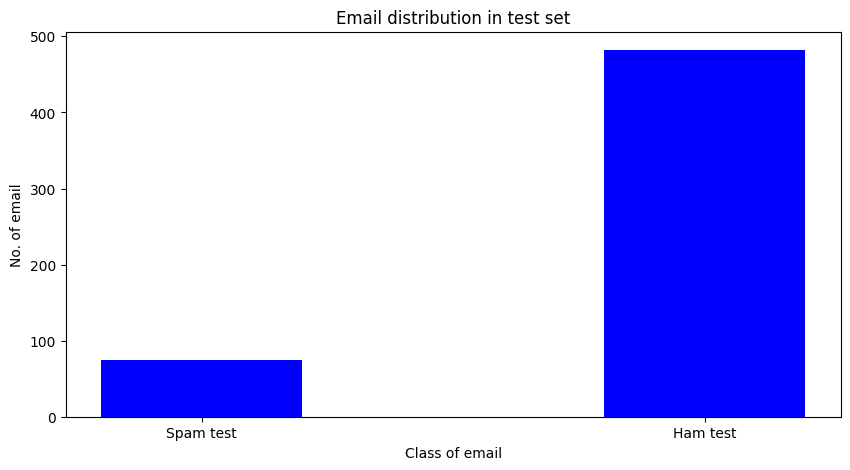

In [16]:
values = [numOfSpamTest, numOfHamTest]
classes = ["Spam test", "Ham test"]

fig = plt.figure(figsize = (10, 5))

plt.bar(classes, values, color ='blue',
        width = 0.4)

plt.xlabel("Class of email")
plt.ylabel("No. of email")
plt.title("Email distribution in test set")
plt.show()

In [17]:
import string


for i in range(len(X_train)):
  X_train[i] = X_train[i].lower()
  X_train[i] = X_train[i].translate(str.maketrans('', '', string.punctuation))
  X_train[i] = X_train[i].translate(str.maketrans('', '', string.digits))

X_train[1]

'are you driving or training'

In [18]:
for i in range(len(X_val)):
  X_val[i] = X_val[i].lower()
  X_val[i] = X_val[i].translate(str.maketrans('', '', string.punctuation))
  X_val[i] = X_val[i].translate(str.maketrans('', '', string.digits))

X_val[0]

'just sleepingand surfing'

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(use_idf=True)

In [21]:
fitted_vectorizer = vectorizer.fit(X_train)
vector = fitted_vectorizer.transform(X_train)

In [22]:
vector_val = vectorizer.transform(X_val)

In [23]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

gnb.fit(vector.toarray(),y_train)
gnb.score(vector.toarray(),y_train)

0.9497407259672915

In [24]:
gnb.score(vector_val.toarray(),y_val)

0.9014336917562724

In [ ]:
y_pred = gnb.predict(vector_val.toarray())

y_pred

In [32]:
from sklearn.metrics import precision_score
precision_spam = precision_score(y_val, y_pred, pos_label="spam")
precision_spam

0.5909090909090909

In [31]:
precision_ham = precision_score(y_val, y_pred, pos_label="ham")
precision_ham

0.9776785714285714

In [28]:
from sklearn.metrics import recall_score
recall_spam = recall_score(y_val, y_pred, pos_label="spam")
recall_spam

0.8666666666666667

In [29]:
recall_ham = recall_score(y_val, y_pred, pos_label="ham")
recall_ham

0.906832298136646

In [26]:
from sklearn import metrics

In [33]:
confusion_matrix = metrics.confusion_matrix(y_val, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

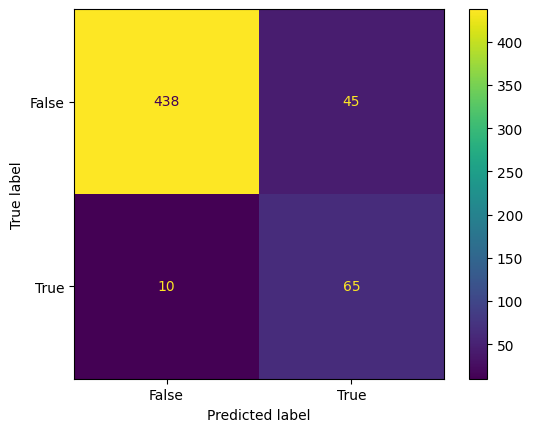

In [34]:
cm_display.plot()
plt.show()